--- 
 다중 선형 회귀(Multivariable Linear regression) 


-------------------------------------------------------------------------------- 
epoch :    0/1000 
cost : 29661.800781 
accuracy : 0.00 

-------------------------------------------------------------------------------- 
epoch :  100/1000 
cost : 1.563628 
accuracy : 0.99 

-------------------------------------------------------------------------------- 
epoch :  200/1000 
cost : 1.497595 
accuracy : 0.99 

-------------------------------------------------------------------------------- 
epoch :  300/1000 
cost : 1.435044 
accuracy : 0.99 

-------------------------------------------------------------------------------- 
epoch :  400/1000 
cost : 1.375726 
accuracy : 0.99 

-------------------------------------------------------------------------------- 
epoch :  500/1000 
cost : 1.319497 
accuracy : 0.99 

-------------------------------------------------------------------------------- 
epoch :  600/1000 
cost : 1.266215 
accuracy : 0.99 

--------------------------------------------

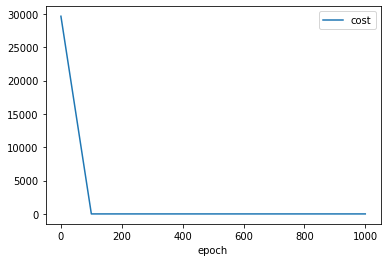

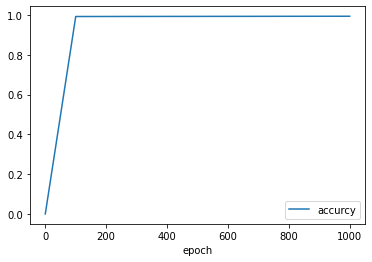


w1 : 
    torch.Size([1]) tensor([0.7179])

w2 : 
    torch.Size([1]) tensor([0.6125])

w3 : 
    torch.Size([1]) tensor([0.6801])

b : 
    torch.Size([1]) tensor([0.0092])



In [1]:

import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)
nb_epochs = 1000
mu.plt_init()

for epoch in range(nb_epochs + 1):
    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # accuracy 계산
    accuracy = mu.get_regression_accuracy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        mu.log_epoch(epoch, nb_epochs, cost, accuracy)

mu.plt_show()
mu.log("w1", w1)
mu.log("w2", w2)
mu.log("w3", w3)
mu.log("b", b)



--- 
 벡터와 행렬 연산으로 바꾸기 


x_train.shape : torch.Size([5, 3])
y_train.shape : torch.Size([5, 1])
-------------------------------------------------------------------------------- 
epoch :    0/1000 
cost : 29661.800781 
accuracy : 0.00 

-------------------------------------------------------------------------------- 
epoch :  100/1000 
cost : 1.563628 
accuracy : 0.99 

-------------------------------------------------------------------------------- 
epoch :  200/1000 
cost : 1.497595 
accuracy : 0.99 

-------------------------------------------------------------------------------- 
epoch :  300/1000 
cost : 1.435044 
accuracy : 0.99 

-------------------------------------------------------------------------------- 
epoch :  400/1000 
cost : 1.375726 
accuracy : 0.99 

-------------------------------------------------------------------------------- 
epoch :  500/1000 
cost : 1.319507 
accuracy : 0.99 

-------------------------------------------------------------------------------- 
epoch :  600/1000 
cost : 1.

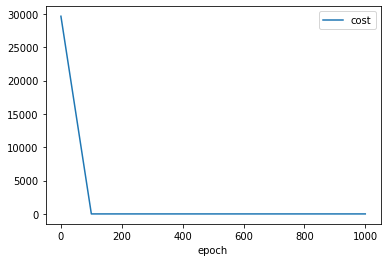

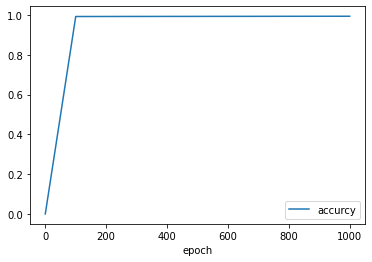


W : 
    torch.Size([3, 1]) tensor([[0.7179],
            [0.6125],
            [0.6801]])

b : 
    torch.Size([1]) tensor([0.0092])



In [2]:

x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])

y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

mu.log("x_train.shape", x_train.shape)
mu.log("y_train.shape", y_train.shape)

W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

hypothesis = x_train.matmul(W) + b

x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

mu.plt_init()

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # accuracy 계산
    accuracy = mu.get_regression_accuracy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        mu.log_epoch(epoch, nb_epochs, cost, accuracy)

mu.plt_show()
mu.log("W", W)
mu.log("b", b)
